## Sentiment Analysis of Amazon reviews for BD Coffee make

In this notebook, the reviews from Amazon on Black and Decker Coffee Maker analyzed. 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

#### Data Preparation and Visualization:

In [105]:
#reading the sqlite file and making a df from the data
con = sqlite3.connect("Amazon.sqlite")
df = pd.read_sql_query("SELECT * from JLB", con)

In [106]:
#Showing the head of the dataset
df.head()

,rating,date,location,color,review_title,review,comment
0,1.0,January-29-2019,United States,Color: Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11
1,2.0,October-16-2018,United States,Verified Purchase,"Mono, directional, no user EQ :(",I held out buying one of these speakers becaus...,6
2,3.0,December-12-2018,United States,Color: Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3
3,5.0,October-26-2018,United States,Color: Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1
4,5.0,June-3-2019,United States,Color: Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2


In [107]:
df.shape

(1657, 7)

Checking to see if there is any null data in our dataset:

In [108]:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment
1656,5.0,June-4-2019,United States,None,None,None,None


In [109]:
df.dropna()

,rating,date,location,color,review_title,review,comment
0,1.0,January-29-2019,United States,Color: Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11
1,2.0,October-16-2018,United States,Verified Purchase,"Mono, directional, no user EQ :(",I held out buying one of these speakers becaus...,6
2,3.0,December-12-2018,United States,Color: Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3
3,5.0,October-26-2018,United States,Color: Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1
4,5.0,June-3-2019,United States,Color: Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2
5,4.0,December-5-2018,United States,Color: Red,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,1
6,5.0,November-10-2018,United States,Color: Black,Good product but no speakerphone,I bought this last week. The speaker sound qua...,0
7,5.0,October-26-2018,United States,Color: Black,I love JBL and harman!,I always buy JBL because it's a great product ...,5
8,1.0,March-6-2019,United States,Color: Black,Low quality and long replacement time period,My husband bought this speaker at the beginnin...,0
9,1.0,January-29-2019,United States,Color: Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11


In [114]:
df.reset_index()
df.dropna()
df.drop_duplicates()
df = df.mask(df.eq('None')).dropna()

In [115]:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment


Changing the rating values to a binary form. To do this, first we check the relationship between rating and comments:

In [116]:
#converting the data to numerical
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['comment'] = pd.to_numeric(df['comment'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

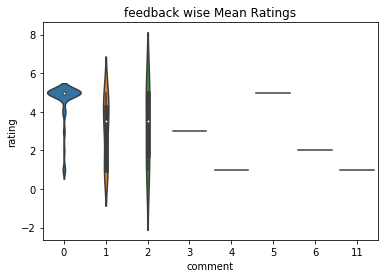

In [117]:
sns.violinplot(df['comment'], df['rating'])
plt.title("feedback wise Mean Ratings")
plt.show()

We assign ratings above 3 as 1 and below 3 as 0.

In [118]:
df['rating'] = np.where(df['rating'] >= 3, 1, 0)

In [119]:
df.sample(10)

,rating,date,location,color,review_title,review,comment
84,1,July-25-2019,United States,Color: Blue,Great Speaker,I've taken this thing on the go for a few mont...,0
336,1,February-5-2020,United States,Color: Black,Good sound,So far so good. Great sound and I have no trou...,0
1621,1,April-8-2019,United States,Color: Black,"Great sound, great value",Love this speaker,0
1173,0,September-13-2019,United States,Color: Black,the charger,when i buy the jbl and open de box no coming t...,0
1404,1,June-11-2019,United States,Color: Sand,Pretty neat,Good for playing music,0
970,1,January-20-2020,United States,Color: Gray,Not a title,Great product,0
1355,1,June-9-2019,United States,Color: Red,don’t lose the charger cord,"good price works well, can survive long drops",0
1351,0,January-17-2020,United States,Color: Black,The speaker is not that loud,The speaker is not that loud,0
951,1,February-10-2020,United States,Color: Yellow,I love it and recommend it but ..,"The voice not as high as I excepted , but it d...",0
1650,1,November-8-2018,United States,Color: Blue,Great clear sound with great bass.,Crisp clear sound with great bass! I love bein...,0


Performing some statistical analysis on the data

In [120]:
df.describe()

,rating,comment
count,1656.000000,1656.000000
mean,0.917271,0.047101
std,0.275556,0.507542
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,11.000000


In [121]:
df.groupby('rating').describe()

comment                                              
         count      mean       std  min  25%  50%  75%   max
rating                                                      
0        137.0  0.343066  1.550322  0.0  0.0  0.0  0.0  11.0
1       1519.0  0.020408  0.238528  0.0  0.0  0.0  0.0   5.0

In [112]:
df.reset_index()
df.dropna()
df.drop_duplicates()
df = df.mask(df.eq('None')).dropna()

According to the table above most of the users are satisfied with the JLB Speaker.

Here we will add a new column to our dataframe and will check the length of the reviews:

In [123]:
#Adding a new column and entering the length of the reviews:
df['length_of_review'] = df['review'].apply(len)
df.head()

,rating,date,location,color,review_title,review,comment,length_of_review
0,0,January-29-2019,United States,Color: Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11,345
1,0,October-16-2018,United States,Verified Purchase,"Mono, directional, no user EQ :(",I held out buying one of these speakers becaus...,6,682
2,1,December-12-2018,United States,Color: Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3,238
3,1,October-26-2018,United States,Color: Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1,531
4,1,June-3-2019,United States,Color: Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2,2636


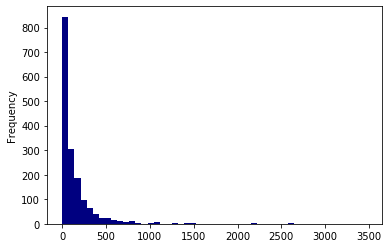

In [124]:
#Plotting the histogram of the length of reviews
df['length_of_review'].plot(bins=50, kind='hist', color='navy');

The Distribution Plot above, illustrates a distribution of Length of the Reviews written by buyers for BD Coffee Maker. Most of the Reviews are between 0 to 500 words.

In [125]:
#Describing the data according to the length of reviews
df.groupby('length_of_review').describe().sample(10)

rating                                              comment  \
                  count      mean       std  min  25%  50%  75%  max   count   
length_of_review                                                               
25                 12.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    12.0   
1                   7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     7.0   
550                 1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0     1.0   
301                 2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     2.0   
724                 1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0     1.0   
108                 3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     3.0   
82                  7.0  0.857143  0.377964  0.0  1.0  1.0  1.0  1.0     7.0   
649                 1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0     1.0   
738                 1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0     1.0   
61                  7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     7.0   

                                                     
                 mean  std  min  25%  50%  75%  max  
length_of_review                                     
25                0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1                 0.0  0.0  0.0  0.0  0.0  0.0  0.0  
550               0.0  NaN  0.0  0.0  0.0  0.0  0.0  
301               0.0  0.0  0.0  0.0  0.0  0.0  0.0  
724               0.0  NaN  0.0  0.0  0.0  0.0  0.0  
108               0.0  0.0  0.0  0.0  0.0  0.0  0.0  
82                0.0  0.0  0.0  0.0  0.0  0.0  0.0  
649               0.0  NaN  0.0  0.0  0.0  0.0  0.0  
738               0.0  NaN  0.0  0.0  0.0  0.0  0.0  
61                0.0  0.0  0.0  0.0  0.0  0.0  0.0

Here we will plot the histograms of the length of reviews for high ratings and low ratings to see if there is a difference:

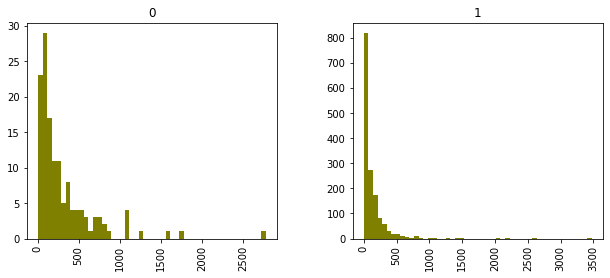

In [126]:
df.hist(column='length_of_review', by='rating', bins=50,figsize=(10,4), color='olive');

Unsatisfied people have written longer sentences when reviewing the product.

Here in a Pie Chart the percentage of satisfied versus unsatisfid people with the Coffee Maker will be depicted.

In [127]:
import plotly.graph_objs as go
import plotly.offline as py

In [129]:
ratings = df['rating'].value_counts()
colors = ['gold', 'mediumturquoise']

label_rating = ratings.index
size_rating = ratings.values

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         name = 'JLB Speaker', hole = 0.0)

pdf = [rating_piechart]

layout = go.Layout(title = 'Distribution of Ratings for JLB Speaker')

fig = go.Figure(data = pdf, layout = layout)
fig.update_traces(hoverinfo='label+percent+value', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

py.iplot(fig)

Adding another column to the dataframe named feedback and specifying in it which review has received a comment (1) and which has not(0).

In [130]:
df['feedback'] = np.where(df['comment'] > 0, 1, 0)

In [131]:
df.sample(10)

,rating,date,location,color,review_title,review,comment,length_of_review,feedback
1435,1,February-22-2020,United States,Color: Black,Good speaker,Good speaker,0,12,0
1385,1,March-21-2020,United States,Color: Green,It’s nice,Love it,0,7,0
1151,1,March-4-2019,United States,Color: Red,Súper ...!!!,"Tremendo sonido, buen vendedor",0,30,0
887,1,July-13-2019,United States,Color: Black,Great speaker,Excellent sound,0,15,0
916,1,January-8-2020,United States,Color: Blue,Awesome!,I love my speaker.,0,18,0
754,0,July-10-2019,United States,Color: Gray,Broken after 2 charges. That’s a waste.,"After 3 weeks (and only 2 full charges), I can...",0,196,0
1105,0,September-16-2019,United States,Color: Black,speaker,Sound quality not as good as what I was expect...,0,92,0
1364,1,December-31-2019,United States,Color: Blue,.,Excatly what i intended..,0,25,0
551,1,December-13-2019,United States,Color: Black,👍🏻,Great product,0,13,0
772,1,February-20-2020,United States,Color: Camouflage,Get the flip instead,The smaller flip 4 is not only louder but soun...,0,117,0


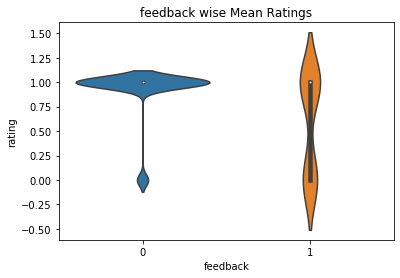

In [132]:
sns.violinplot(df['feedback'], df['rating'])
plt.title("feedback wise Mean Ratings")
plt.show()

Here the most frequenctly repeated words in reviews will be retreived.

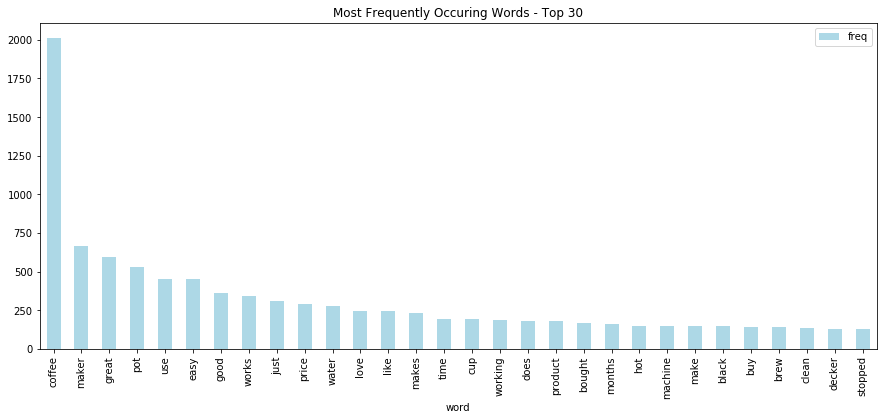

In [71]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review) #learn a vocabulary
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', color='lightblue', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

The bar graph above indicates the most frequently used words in the reviews. This will give us some idea about people's thoughts on the Coffee maker.

In [72]:
import spacy
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!python -m spacy download en_core_web_md

stopwords = stopwords.words('english')
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [73]:
import spacy
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!python -m spacy download en_core_web_md


stopwords = stopwords.words('english')
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    table = str.maketrans({key: None for key in string.punctuation})

    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        ###Convert text to lowercase, strip whitespace and remove personal pronouns
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        ###Remove stopwords
        tokens = [tok.translate(table) for tok in tokens if tok not in stopwords ]
        tokens = ' '.join(tokens)
        #Remove extra whitespace
        tokens = ' '.join(tokens.split())
        texts.append(tokens)
    return pd.Series(texts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaveh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
